## Machine Learning for Signal Processing 2019/2020 
### Teacher: Danilo Comminiello<br>Exam Project

* **Project title**: *Deep Learning for Automatic Speech Recognition in HR*.
* **Student(s)**: *Francesco Vincelli, 1727959*.
* **Reference paper / topic**: Titouan Parcollet1, Mirco Ravanelli, Mohamed Morchid, Georges Linarès, Renato De Mor ; *Speech Recognitionwith Quaternion Neural Networks* (32nd Conference on Neural Information Processing Systems (NIPS 2018), IRASL workshop Montréal, Canada).
* **Starting and delivery dates**: *April 8th, 2021* [I can check so you'd rather be honest ;)]

*Rename the notebook as*: [MLSP]_Project_LastName1_LastName2_LastName3.ipynb.

## Part 1: Report

### 1.1 Deep Convolutional Neural Networks for Automatic Speech Recognition
 
State-of-the-art automatic speech recognition (ASR) systems map the speech signal into its corresponding text. Traditional ASR systems are based on Gaussian mixture model. The emergence of deep learning drastically improved the recognition rate of ASR systems, replacing traditional ones.

Deep learning systems can also be trained in end-to-end manner. End-to-end ASR systems are gaining much popularity due to simplified model-building process and abilities to directly map speech into the text without any predefined alignments. Three major types of end-to-end architectures for ASR are:
- attention-based methods
- connectionist temporal classification
- convolutional neural network (CNN)-based direct raw speech model.

In this work, CNN-based acoustic model (both real and quaternionic) with Connectionist Temporal Classification is discussed. It establishes the relation between raw speech signal and phones in a data-driven manner. 
Relevant features and classifier both are jointly learned from the raw speech which is processed by first convolutional layer to learn the feature representation. The output of first convolutional layer represents an intermediate representation, which is more discriminative and further processed by rest convolutional layers.

This system uses only few parameters and performs better than traditional cepstral feature-based systems. The performance of the system is evaluated for LibriSpeech ASR Corpus dataset and claimed similar performance as MFCC.

### 2. Quaternion Neural Networks for ASR

While recent researches focus on novel model architectures, the acoustic input features remain almost unchanged. Traditional ASR systems rely on multidimensional acoustic features such as the *Mel filter
bank* energies alongside with the first, and second order derivatives to characterize time-frames that compose the signal sequence. Considering that these components describe three different views of the same element, neural networks have to learn both the internal relations that exist within these features, and external or global dependencies that exist between the time-frames. 

Quaternion-valued neural networks (QNN), recently received an important interest from researchers to process and learn such relations in multidimensional spaces. Indeed, quaternion numbers and QNNs have shown their efficiency to process multidimensional inputs as entities, to encode internal dependencies, and to solve many tasks with up to four times less learning parameters than real-valued models. 

### 3. Motivations
#### 3.1. Drawbacks of Real-valued NNs for ASR
A major challenge of current machine learning models is to obtain efficient representations of relevant information for solving a specific task.

Nonetheless, real-valued neural networks usually require a huge set of parameters to well-perform on speech recognition tasks, and hardly code internal dependencies within the features, since they are considered at the same level as global dependencies during the learning.

#### 3.2. Advantage of Quaternions in speech signal features representation
A better representation of multidimensional data has to be explored to naturally capture internal relations within the input features. For example, an efficient way to represent the information composing an acoustic signal sequence is to consider each time-frame as being a whole entity of three strongly related elements, instead of a group of unidimensional elements that could be related to each others, as in traditional real-valued neural networks. Indeed, with a real-valued NN, the latent relations between the Mel filter banks energies, and the first and second order derivatives of a given time-frame are hardly coded in the latent space since the weight has to find out these relations among all the time-frames composing the sequence. Quaternions are fourth dimensional entities and allow one to build and process elements made of up to four elements, mitigating the above described problem. Indeed, the quaternion algebra and more precisely the Hamilton product allows quaternion neural network to capture these internal latent relations within the features of a quaternion. In fact, the quaternion-weight components are shared through multiple quaternion input parts during the Hamilton product , creating relations within the elements.

Figure below shows that the multiple weights required to code latent relations within a feature are considered at the same level as for learning global relations between different features, while the quaternion weight *w* codes these internal relations within a unique quaternion $Q_{out}$ during the Hamilton product.

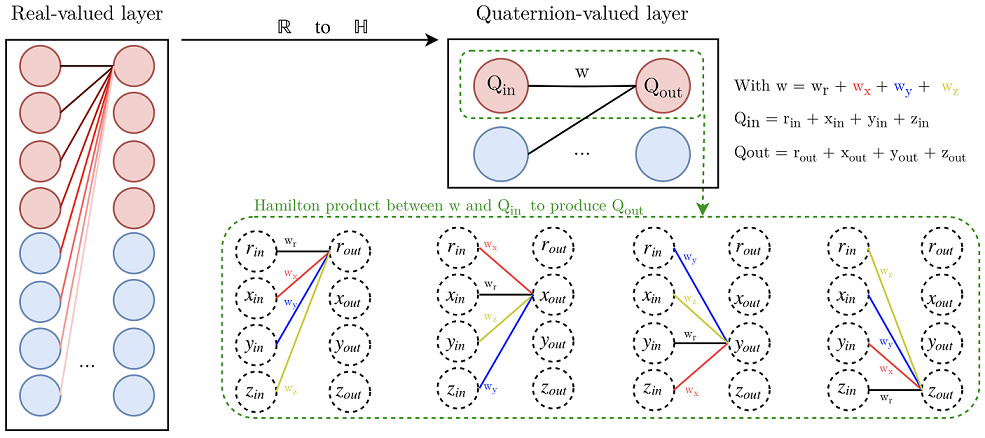

Second, quaternion neural networks make it possible to deal with the same signal dimension than real-valued NN, but with four times less neural parameters. Indeed, a 4-number quaternion weight linking two 4-number quaternion units only has 4 degrees of freedom, whereas a standard neural net parametrization have 4 × 4 = 16, i.e., a 4-fold saving in memory. Therefore, the natural multidimensional representation of quaternions alongside with their ability to drastically reduce the number of parameters indicate that hyper-complex numbers are a better fit than real numbers to create more efficient models in multidimensional spaces such as speech recognition.

### 4. Quaternion Neural Networks
Real-valued neural networks architectures are extended to the quaternion domain to benefit from its capacities.

The quaternion algebra H defines operations between quaternion numbers. $A$ quaternion Q is an extension of a complex number defined in a four dimensional space as:
$$ Q = r1 +x\mathbf{i} +y\mathbf{j} +z\mathbf{k} $$

where r, x, y, and z are real numbers, and 1, \mathbf{i}, \mathbf{j}, and \mathbf{k} are the quaternion unit basis. In a quaternion, r is the real part, while $x\mathbf{i} + y\mathbf{j} + z\mathbf{k}$ with $\mathbf{i}^2 = \mathbf{j}^2 = \mathbf{k}^2 = \mathbf{ijk} = −1$ is the imaginary part, or the
vector part. Such a definition can be used to describe spatial rotations. The information embedded in
the quaterion $Q$ can be summarized into the following matrix of real numbers, that turns out to be more suitable for computations:

$$
Q_{mat} = \begin{bmatrix} 
r & -x & -y & -z \\
x & r & -z & y \\
y & z & r & -x \\
z & -y & x & r
\end{bmatrix}
$$

The conjugate $Q^*$ of $Q$ is defined as:
$$ Q^* = r1 -x\mathbf{i} - y\mathbf{j} -z\mathbf{k} $$

Then, a normalized or unit quaternion $Q^n$ is expressed as:

$$
Q^n = \frac{Q}{\sqrt{r^2 + x^2 + y^2 + z^2}}
$$

Finally, the Hamilton product ⊗ between two quaternions $Q_1$ and $Q_2$ is computed as follows:

\begin{equation}
\begin{split}
Q_1 ⊗ Q_2  = &(r_1 r_2 - x_1 x_2 - y_1 y_2 - z_1 z_2) \\
&(r_1 x_2 - x_1 r_2 - y_1 z_2 - z_1 y_2)\mathbf{i} \\
&(r_1 y_2 - x_1 z_2 - y_1 r_2 - z_1 x_2)\mathbf{j} \\
&(r_1 z_2 - x_1 y_2 - y_1 x_2 - z_1 r_2)\mathbf{k} \\
\end{split}
\end{equation}

4.1 Quaternion Convolutional Networks (QCNNs)

Convolutional neural networks (CNN) have been proposed to capture the high-level relations that occur between neighbours features such as shape and edges on an image. However, internal dependencies within the features are considered at the same level than these high-level relationsby real-valued CNNs, and it is thus not guaranteed that they are well-captured.  In this extend, aquaternion convolutional neural network (QCNN) have been proposed. Let $y_{ab}^l$ and $S_{ab}^l$, be the quaternion output and the pre-activation quaternion output at layer $l$ and at the indexes$(a,b)$ of the new feature map, and $w$ the quaternion-valued weight filter map of size $K×K$. A formal definition of the convolution process is:

$$
y_{ab}^l = \alpha (S_{ab}^l)
$$

with

$$
S_{ab}^l = \sum_{c=0}^{k-1} \sum_{d=0}^{k-1} w^{l-1} ⊗ y_{(a+c)(b+d)}^l
$$

and where $\alpha$ is a quaternion split activation function defined as:

$$
\alpha(Q) = f(r) + f(x)\mathbf{i} + f(y)\mathbf{j} + f(z)\mathbf{k}
$$

with $f$ corresponding to any standard activation function. The output layer of a quaternion neuralnetwork is commonly either quaternion-valued such as for quaternion approximation, or real-valued to obtains a posterior distribution based on a softmax function following the split approach ofEq. 8. Indeed, target classes are often expressed as real numbers. Finally, the full derivation of thebackpropagation algorithm for quaternion valued neural networks can be found in.

### 1.2 Neural Network Architectures for End-to-End Automatic Speech Recognition

#### 1.2.1 Temporal Convolutional Networks

TCNs are inspired by recent convolutional architectures for sequential data and combines simplicity, autoregressive prediction, and very long memory. The TCN is designed from two basic principles:

- The convolutions are causal, meaning that there is no information leakage from future to past.

- The architecture can take a sequence of any length and map it to an output sequence of the same length just as with an RNN.

To achieve the first point, the TCN uses causal convolutions, i.e., convolutions where an output at time $t$ is convolved only with elements from time $t$ and earlier in the previous layer. To accomplish the second point, the TCN uses a *1D fully-convolutional* network architecture, where each hidden layer is the same length as the input layer.


##### **Dilated Convolution**

Simple causal convolutions have the disadvantage to only look back at history with size linear in the depth of the network, i.e. the receptive field grows linearly with every additional layer. To circumvent this fact, the architecture employs dilated convolutions that enable an exponentially large receptive field. More formally, for an input sequence $x \in \mathbb{R}$ and a filter $h : \{0, ..., k-1\} \rightarrow  \mathbb{R}$ , the dilated convolution operation $H$ on element $x$ of the sequence is defined as
$$
H(x) = (x_d h)(x) = \sum_{i=0}^{k-1} f(i) x_{s-d \cdot i} 
$$
where $d=2^v$ is the dilation factor, with the level of the network, and $k$ is the filter size. The term $s-d \cdot i$ accounts for the direction of the past. Dilation is equivalent to introducing a fixed step between every two adjacent filter taps, as it can be seen in the following figure:

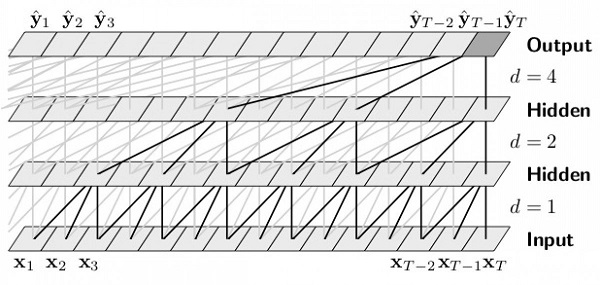

Using larger dilation enables an output at the top level to represent a wider range of inputs, thus effectively expanding the receptive field of a CNN. There are two ways to increase the receptive field of a TCN: choosing lager filter sizes $k$ and increasing the dilation factor $d$, since the effective history of one layer is $(k-1)d$

**Residual Block**

Another architectural element of a TCN are residual connections. In place of a convolutional layer, TCNs employ a generic residual module. Each residual block contains a branch leading out to a series of transformations $\mathcal{F}$ , whose outputs are added to the input $x$ of the block:
$$o = Activation(x + \mathcal{F}(x))$$

This effectively allows layers to learn modifications to the identity mapping rather than the entire transformation, which has been shown to benefit deep neural networks. Especially for very deep networks stabilization becomes important, for example, in the case where the prediction depends on a large history size ($>2^{12}$) with a high-dimensional input sequence.

A residual block has two layers of dilated causal convolutions and rectified linear units (ReLU) as non-linearities as shown in the following figure:

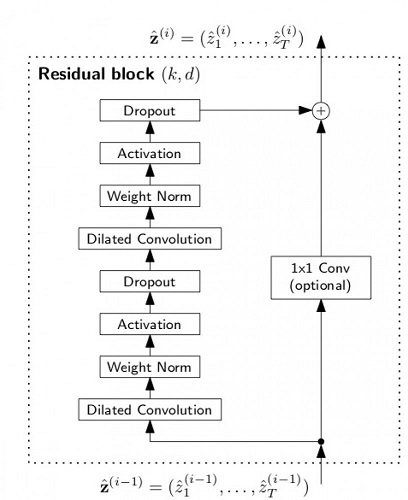

Weight normalization (Salimans, 2016) is applied to the convolutional filters and a spatial dropout (Srivastava, 2014) is added after each dilated convolution for regularization, meaning that at each training step a whole channel is zeroed out.


Thus, the TCN architecture appears not only to be more accurate than canonical recurrent networks such as LSTMs and GRUs, it also contains the following properties: 

- Parallelism: Unlike in RNNs where the predictions for later time steps must wait for their predecessors to complete, convolutions can be calculated in parallel because the same filter is used in each layer. Therefore, in both training and evaluation, a long input sequence can be processed as a whole, instead of sequentially as in RNNs.

- Flexible receptive field size: The receptive field size can be changed in multiple ways. For instance, stacking more dilated convolutional layers, using larger dilation factors, or increasing the filter size are all viable options. Thus, TCNs afford better control of the model’s memory size, and are easy to adapt to different domains.
    
- Low memory requirement for training: Especially in the case of a long input sequence, LSTMs and GRUs can easily use up a lot of memory to store the partial results for their multiple cell gates. In TCNs, however, the filters are shared across a layer, with the back-propagation path depending only on the network depth.

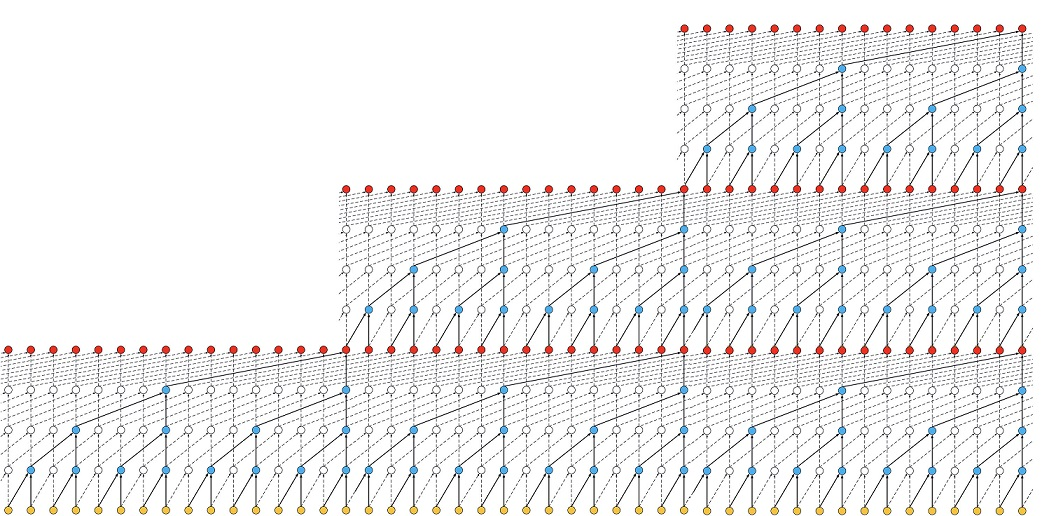

#### 1.2.2 Residual-Convolutional (Time-Distributed) Networks

The Residual Network, or *ResNet*, architecture for convolutional neural networks was proposed by Kaiming He, et al. in their 2016 paper titled “Deep Residual Learning for Image Recognition”.
A key innovation in the ResNet arhitecture was the residual module. The residual module, specifically the identity residual model, is a block of two convolutional layers with the same number of filters and a small filter size where the output of the second layer is added with the input to the first convolutional layer. Drawn as a graph, the input to the module is added to the output of the module and is called a shortcut connection.

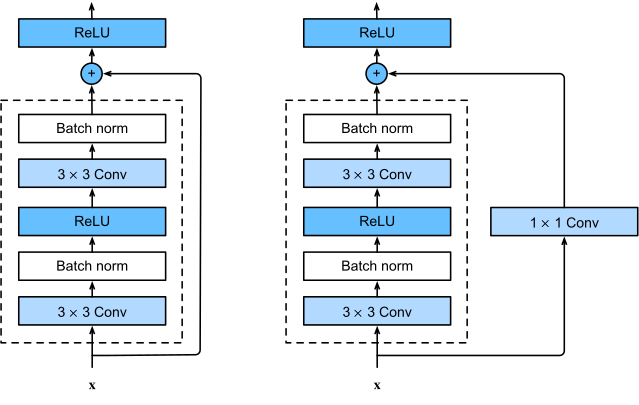

A limitation with a direct implementation of the residual block is that if the number of filters in the input layer does not match the number of filters in the last convolutional layer of the module (defined by n_filters), then we will get an error.

One solution is to use a $1×1$ convolution layer, often referred to as a *projection layer*, to either increase the number of filters for the input layer or reduce the number of filters for the last convolutional layer in the module. The former solution makes more sense, and is the approach proposed in the paper, referred to as a projection shortcut.

Differently from the canonical ResNet architecture, the fully-connected block on the top of the network exploits the *TimeDistributed* wrapper layer.

When we are dealing with input data which are chronologically ordered, such as, in this case, a sequence of phonemes and the respective frequences in an audio signal, what we need is to be able to inject a sequence as input, and to make predictions of what that sequence is showing.

The output of the convolutional stage (performed by the residual blocks) is sequence of outputs: that means the output is a processed time series, with sequential information in it. We want Dense() layers to take this information and use it to process the signal further. In particular, you want some Dense architecture to process each of these sequential outputs one by one. By using the TimeDistributed() wrapper it's like if you're iterating the same Dense() architecture on this sequential output.

## Part 2: External libraries


In [ ]:
# In case you forgot the answer to the Ultimate Question of Life, the Universe and Everything
# !pip install python-42

### External python modules

In [ ]:
# ====================
# Install requirements

!pip install python_speech_features
!pip install librosa
!pip install matplotlib
!pip install pydub
!apt-get install ffmpeg
!apt-get install libav-tools
!pip install ffmpeg-python 

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp37-none-any.whl size=5887 sha256=9e92314e0eee02ea668c6ef6cae188ea2c8aa0698d3bf307b318b30b6ef3ee1d
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Package 'libav-tools' has no installation candidate


### External modules from reference repsitories

In [ ]:
# ============================
# Mount drive workig directory

from google.colab import drive
drive.mount('/content/gdrive')

# Set up workdir
%cd "gdrive/My Drive/[MLSP]_Project"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/[MLSP]_Project'
/content/gdrive/My Drive/[MLSP]_Project
 complexnn	     shared
 Corrupted_Dataset  'TF_KERAS_[MLSP]_Project_Vincelli.ipynb'
 images		    'TF_KERAS_[MLSP]_Project_Vincelli_NEW.ipynb'
 LibriSpeech	     train_corpus.json
 new_results	     valid_corpus.json
 old_json_corpus     vui_notebook.ipynb
 results


In [ ]:
# ===============
# Import packages

import math
import numpy as np
import soundfile
from   numpy.lib.stride_tricks import as_strided

import tensorflow as tf
from   tensorflow.keras import backend as K
from   tensorflow.keras import layers
from   tensorflow.keras import models
from   tensorflow.keras.models import Model
from   tensorflow.keras.layers import (BatchNormalization, Conv1D, Dense, Input, Flatten, Dropout,
                                       Add, TimeDistributed, Activation, Bidirectional, SimpleRNN,
                                       GRU, LSTM, LeakyReLU, PReLU, MaxPooling1D, Lambda)

from   tensorflow.keras.optimizers import SGD, Adam, RMSprop
from   tensorflow.keras.initializers import Constant, RandomUniform

from   tensorflow.keras.callbacks import ModelCheckpoint  
import complexnn as qnn
from   complexnn import QuaternionConv1D, QuaternionConv2D, QuaternionDense, QuaternionBatchNormalization

# (alternative quaternion layers package)
# import quaternion_layers
# from quaternion_layers import QConv1D, QConv2D, QDense

import os
import _pickle as pickle
import json
import random
from   python_speech_features import mfcc, fbank, sigproc
import librosa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from   mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import Markdown, display
from IPython.display import Audio

## Part 3: Your code

### 3.0 Prepare Data


flac_to_wav.sh converts all flac files to .wav format and create_desc_json.py will create a corpus for each data set: This will be a JSON formatted dictionary that includes the filepath, the length of the file, and the ground truth label.

For this script to work, you will need to obtain the ffmpeg/libav package. Use the following command:

In [ ]:
%cd "LibriSpeech"
!ls

/content/gdrive/.shortcut-targets-by-id/1qJjVK0sjOAqnT9tXBaBF9vT-fie1XJpU/[MLSP]_Project/data/LibriSpeech
dev-clean   flac_to_wav.sh  train-clean-100
DEV_cutted  test-clean	    TRAIN_cutted


Run flac_to_wav.sh from the directory containing the dataset. This might take a while depending on your machine:

In [ ]:
!sh flac_to_wav.sh

Output streaming troncato alle ultime 5000 righe.
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6.107.100 /  6.107.100
  libavresample   3.  7.  0 /  3.  7.  0
  libswscale      4.  8.100 /  4.  8.100
  libswresample   2.  9.100 /  2.  9.100
  libpostproc    54.  7.100 / 54.  7.100
Input #0, flac, from './train-clean-100/1455/138263/1455-138263-0040.flac':
  Duration: 00:00:14.83, start: 0.000000, bitrate: 152 kb/s
    Stream #0:0: Audio: flac, 16000 Hz, mono, s16
Stream mapping:
  Stream #0:0 -> #0:0 (flac (native) -> pcm_s16le (native))
Press [q] to stop, [?] for help
Output #0, wav, to './train-clean-100/1455/138263/1455-138263-0040.wav':
  Metadata:
    ISFT            : Lavf57.83.100
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 16000 Hz, mono, s16, 256 kb/s
    Metadata:
      encoder         : Lavc57.107.100 pcm_s16le
size=     464kB time=00:00:14.83 bitrate= 256.0kbits/s 

In [ ]:
"""
Use this script to create JSON-Line description files that can be used to
train deep-speech models through this library.
This works with data directories that are organized like LibriSpeech:
data_directory/group/speaker/[file_id1.wav, file_id2.wav, ...,
                              speaker.trans.txt]

Where speaker.trans.txt has in each line, file_id transcription
"""

from __future__ import absolute_import, division, print_function

import argparse
import json
import os
import wave


def main(data_directory, output_file):
    labels = []
    durations = []
    keys = []
    for group in os.listdir(data_directory):
        if group.startswith('.'):
            continue
        speaker_path = os.path.join(data_directory, group)
        for speaker in os.listdir(speaker_path):
            if speaker.startswith('.'):
                continue
            labels_file = os.path.join(speaker_path, speaker,
                                       '{}-{}.trans.txt'
                                       .format(group, speaker))
            for line in open(labels_file):
                split = line.strip().split()
                file_id = split[0]
                label = ' '.join(split[1:]).lower()
                audio_file = os.path.join(speaker_path, speaker,
                                          file_id) + '.wav'
                audio = wave.open(audio_file)
                duration = float(audio.getnframes()) / audio.getframerate()
                audio.close()
                keys.append(audio_file)
                durations.append(duration)
                labels.append(label)
    with open(output_file, 'w') as out_file:
        for i in range(len(keys)):
            line = json.dumps({'key': keys[i], 'duration': durations[i],
                              'text': labels[i]})
            out_file.write(line + '\n')



data_directory="LibriSpeech/dev-clean"
output_file="valid_corpus.json"
main(data_directory, output_file)

In [ ]:
import os
path="./LibriSpeech/dev-clean/file.wav"
dir="./data"
full_path=os.path.join(dir, path)
print(full_path)

./data/./LibriSpeech/dev-clean/file.wav


### 3.1 Data Generator and Viasualization

#### Data generator

In [ ]:
RNG_SEED = 123

"""
Defines two dictionaries for converting 
between text and integer sequences.
"""

char_map_str = """
' 0
<SPACE> 1
a 2
b 3
c 4
d 5
e 6
f 7
g 8
h 9
i 10
j 11
k 12
l 13
m 14
n 15
o 16
p 17
q 18
r 19
s 20
t 21
u 22
v 23
w 24
x 25
y 26
z 27
"""
# the "blank" character is mapped to 28

char_map = {}
index_map = {}
for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)+1] = ch
index_map[2] = ' '



class AudioGenerator():
    def __init__(self,
                 step=10, window=25, max_freq=8000, mfcc_dim=20,
        minibatch_size=20, desc_file=None, spectrogram=False, max_duration=12.0, 
        sort_by_duration=False, rate=0.001, quaternion=False, method='librosa'):
        """
        Params:
            step (int): Step size in milliseconds between windows (for spectrogram ONLY)
            window (int): FFT window size in milliseconds (for spectrogram ONLY)
            max_freq (int): Only FFT bins corresponding to frequencies between
                [0, max_freq] are returned (for spectrogram ONLY)
            desc_file (str, optional): Path to a JSON-line file that contains
                labels and paths to the audio files. If this is None, then
                load metadata right away
        """

        self.feat_dim = calc_feat_dim(window, max_freq, rate) if spectrogram else 60
        self.mfcc_dim = mfcc_dim
        self.feats_mean = np.zeros((self.feat_dim,))
        self.feats_std = np.ones((self.feat_dim,))
        self.rng = random.Random(RNG_SEED)
        if desc_file is not None:
            self.load_metadata_from_desc_file(desc_file)
        self.step = step
        self.window = window
        self.max_freq = max_freq
        self.cur_train_index = 0
        self.cur_valid_index = 0
        self.cur_test_index = 0
        self.max_duration=max_duration
        self.minibatch_size = minibatch_size
        self.spectrogram = spectrogram
        self.sort_by_duration = sort_by_duration
        self.quaternion = quaternion
        self.method=method
        
    def get_batch(self, partition):
        """ Obtain a batch of train, validation, or test data
        """
        if partition == 'train':
            audio_paths = self.train_audio_paths
            cur_index = self.cur_train_index
            texts = self.train_texts
        elif partition == 'valid':
            audio_paths = self.valid_audio_paths
            cur_index = self.cur_valid_index
            texts = self.valid_texts
        elif partition == 'test':
            audio_paths = self.test_audio_paths
            cur_index = self.test_valid_index
            texts = self.test_texts
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

        # features = [self.normalize(self.featurize(a)) for a in 
        #     audio_paths[cur_index:cur_index+self.minibatch_size]]

        features = [standardize(self.featurize(a)) for a in 
            audio_paths[cur_index:cur_index+self.minibatch_size]]
        
        # calculate necessary sizes
        max_length = max([features[i].shape[0] 
            for i in range(0, self.minibatch_size)])
        max_string_length = max([len(texts[cur_index+i]) 
            for i in range(0, self.minibatch_size)])
        
        # print("max_length:\n")
        # for f in features:
        #     print(f.shape[1])
            
        # initialize the arrays
        # if self.quaternion: self.mfcc_dim*=3
        
        if self.quaternion:
            X_data = np.zeros([self.minibatch_size, max_length, self.mfcc_dim*3])
        elif self.spectrogram:
            X_data = np.zeros([self.minibatch_size, max_length, 
                self.feat_dim*self.spectrogram + self.mfcc_dim*(not self.spectrogram)])
        else:
            X_data = np.zeros([self.minibatch_size, max_length, self.mfcc_dim])
            
        #### print("X_data.shape: ", X_data.shape)
        
        labels = np.ones([self.minibatch_size, max_string_length]) * 28
        input_length = np.zeros([self.minibatch_size, 1])
        label_length = np.zeros([self.minibatch_size, 1])
        
        for i in range(0, self.minibatch_size):
            # calculate X_data & input_length
            feat = features[i]
            input_length[i] = feat.shape[0]
            
            #### print("X_data[i].shape: ", X_data[i, :feat.shape[0], :])
            
            X_data[i, :feat.shape[0], :] = feat

            # calculate labels & label_length
            label = np.array(text_to_int_sequence(texts[cur_index+i])) 
            labels[i, :len(label)] = label
            label_length[i] = len(label)
 
            # print("feat: ", feat.shape)
            # print("label: ", label.shape)
            # print("input_length: ", feat.shape[0])
            # print("label_length: ", len(label))
            
        # return the arrays
        outputs = {'ctc': np.zeros([self.minibatch_size])}
        inputs = {'the_input': X_data,
                  'the_labels': labels, 
                  'input_length': input_length, 
                  'label_length': label_length 
                  }
        return (inputs, outputs)

    def shuffle_data_by_partition(self, partition):
        """ Shuffle the training or validation data
        """
        if partition == 'train':
            self.train_audio_paths, self.train_durations, self.train_texts = shuffle_data(
                self.train_audio_paths, self.train_durations, self.train_texts)
        elif partition == 'valid':
            self.valid_audio_paths, self.valid_durations, self.valid_texts = shuffle_data(
                self.valid_audio_paths, self.valid_durations, self.valid_texts)
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

    def sort_data_by_duration(self, partition):
        """ Sort the training or validation sets by (increasing) duration
        """
        if partition == 'train':
            self.train_audio_paths, self.train_durations, self.train_texts = sort_data(
                self.train_audio_paths, self.train_durations, self.train_texts)
        elif partition == 'valid':
            self.valid_audio_paths, self.valid_durations, self.valid_texts = sort_data(
                self.valid_audio_paths, self.valid_durations, self.valid_texts)
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

    def next_train(self):
        """ Obtain a batch of training data
        """
        while True:
            ret = self.get_batch('train')
            self.cur_train_index += self.minibatch_size
            if self.cur_train_index >= len(self.train_texts) - self.minibatch_size:
                self.cur_train_index = 0
                self.shuffle_data_by_partition('train')
            yield ret    

    def next_valid(self):
        """ Obtain a batch of validation data
        """
        while True:
            ret = self.get_batch('valid')
            self.cur_valid_index += self.minibatch_size
            if self.cur_valid_index >= len(self.valid_texts) - self.minibatch_size:
                self.cur_valid_index = 0
                self.shuffle_data_by_partition('valid')
            yield ret

    def next_test(self):
        """ Obtain a batch of test data
        """
        while True:
            ret = self.get_batch('test')
            self.cur_test_index += self.minibatch_size
            if self.cur_test_index >= len(self.test_texts) - self.minibatch_size:
                self.cur_test_index = 0
            yield ret

    def load_train_data(self, desc_file='train_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'train')
        self.fit_train()
        if self.sort_by_duration:
            self.sort_data_by_duration('train')

    def load_validation_data(self, desc_file='valid_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'validation')
        if self.sort_by_duration:
            self.sort_data_by_duration('valid')

    def load_test_data(self, desc_file='test_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'test')
    
    def load_metadata_from_desc_file(self, desc_file, partition):
        """ Read metadata from a JSON-line file
            (possibly takes long, depending on the filesize)
        Params:
            desc_file (str):  Path to a JSON-line file that contains labels and
                paths to the audio files
            partition (str): One of 'train', 'validation' or 'test'
        """
        audio_paths, durations, texts = [], [], []
        with open(desc_file) as json_line_file:
            for line_num, json_line in enumerate(json_line_file):
                try:
                    spec = json.loads(json_line)
                    if float(spec['duration']) > self.max_duration:
                        continue
                    audio_paths.append(spec['key'])
                    durations.append(float(spec['duration']))
                    texts.append(spec['text'])
                except Exception as e:
                    # Change to (KeyError, ValueError) or
                    # (KeyError,json.decoder.JSONDecodeError), depending on
                    # json module version
                    print('Error reading line #{}: {}'
                                .format(line_num, json_line))
        if partition == 'train':
            self.train_audio_paths = audio_paths
            self.train_durations = durations
            self.train_texts = texts
        elif partition == 'validation':
            self.valid_audio_paths = audio_paths
            self.valid_durations = durations
            self.valid_texts = texts
        elif partition == 'test':
            self.test_audio_paths = audio_paths
            self.test_durations = durations
            self.test_texts = texts
        else:
            raise Exception("Invalid partition to load metadata. "
             "Must be train/validation/test")
            
    def fit_train(self, k_samples=100):
        """ Estimate the mean and std of the features from the training set
        Params:
            k_samples (int): Use this number of samples for estimation
        """
        k_samples = min(k_samples, len(self.train_audio_paths))
        samples = self.rng.sample(self.train_audio_paths, k_samples)
        feats = [self.featurize(s) for s in samples]
        feats = np.vstack(feats)
        self.feats_mean = np.mean(feats, axis=0)
        self.feats_std = np.std(feats, axis=0)
        
    def featurize(self, audio_clip):
        """ For a given audio clip, calculate the corresponding feature
        Params:
            audio_clip (str): Path to the audio clip
        """
        
        # print("self.quaternion: ", self.quaternion)
        
        if self.spectrogram:
            return spectrogram_from_file(
                audio_clip, step=self.step, window=self.window,
                max_freq=self.max_freq)
        else:
            mfcc_feat=None
            if self.method=='librosa':
                waveform, samplerate = soundfile.read(audio_clip)
                wave_norm = normalize_signal(waveform.astype(np.float32))
                
                melspec = librosa.feature.melspectrogram(
                    y=wave_norm, sr=samplerate, n_fft=1024,
                    win_length=25, hop_length=128,
                    n_mels=40, htk=True, norm=None)
                
                mfcc_feat = librosa.feature.mfcc(
                    S=librosa.core.spectrum.power_to_db(melspec),
                    n_mfcc=self.mfcc_dim, dct_type=2, norm='ortho').transpose((1,0))
                # mfcc_feat = standardize(mfcc_librosa).transpose((1,0))
                
                #print("#### mfcc_feat.shape: ", mfcc_feat.shape)
            else:
                (rate, sig) = wav.read(audio_clip)
                mfcc_feat = psf.mfcc(
                    sig, rate, numcep=self.mfcc_dim, winlen=0.025,
                    winstep=0.01, nfilt=40, preemph=0.97, appendEnergy=True)
                # mfcc_feat = standardize(mfcc_librosa) # self.normalize(mfcc_psf)
            
            if self.quaternion:
                q_mfcc_feat = quaternion_mfcc(mfcc_feat)
                return q_mfcc_feat
            else:
                return mfcc_feat

    def normalize(self, feature, eps=1e-14):
        """ Center a feature using the mean and std
        Params:
            feature (numpy.ndarray): Feature to normalize
        """
        # if self.spectrogram == False:
        #     feat_dim = self.mfcc_dim*3 if self.quaternion else self.mfcc_dim
        #     self.feats_mean = np.zeros((feat_dim,))
        #     self.feats_std = np.ones((feat_dim,))
            
        return (feature - self.feats_mean) / (self.feats_std + eps)
    
    

def normalize_signal(audio):
    """ Normalize float32 signal to [-1, 1] range. """
    gain = 1.0 / (np.max(np.abs(audio)) + 1e-5)
    return audio * gain


def standardize(features):
    """ Standardize globally, independently of features. """
    mean = np.mean(features)
    std = np.std(features)
    return (features - mean) / std


def shuffle_data(audio_paths, durations, texts):
    """ Shuffle the data (called after making a complete pass through 
        training or validation data during the training process)
    Params:
        audio_paths (list): Paths to audio clips
        durations (list): Durations of utterances for each audio clip
        texts (list): Sentences uttered in each audio clip
    """
    p = np.random.permutation(len(audio_paths))
    audio_paths = [audio_paths[i] for i in p] 
    durations = [durations[i] for i in p] 
    texts = [texts[i] for i in p]
    return audio_paths, durations, texts

def sort_data(audio_paths, durations, texts):
    """ Sort the data by duration 
    Params:
        audio_paths (list): Paths to audio clips
        durations (list): Durations of utterances for each audio clip
        texts (list): Sentences uttered in each audio clip
    """
    p = np.argsort(durations).tolist()
    audio_paths = [audio_paths[i] for i in p]
    durations = [durations[i] for i in p] 
    texts = [texts[i] for i in p]
    return audio_paths, durations, texts

#### Features extraction utils

In [ ]:
def quaternion_mfcc(feats):
    #print("mfcc_feat.shape: ", feats.shape)
    delta = librosa.feature.delta(feats)
    delta2 = librosa.feature.delta(feats, order=2)
    # delta3 = librosa.feature.delta(mfcc_librosa, order=3)
    
    q_mfcc = np.concatenate((feats, delta, delta2), axis=-1)
    # q_mfcc_std = standardize(q_mfcc)
    
    #print("Q_mfcc_feat.shape: ", q_mfcc.shape)
    return q_mfcc
    

def complex_mfcc(feat, feat_order=2):
    out = feat
    
    # ============================================== #
    q_idx = 1
    timeStep     = feat.shape[0]
    featuresSize = feat.shape[1]
    q_out = np.zeros((timeStep, 4, featuresSize))
    q_out[:,0,:] = feat
    # ============================================== #
    
    if feat_order >= 1:
        derivative = np.zeros(feat.shape)
        for i in range(1, feat.shape[0] - 1):
            derivative[i, :] = feat[i + 1, :] - feat[i - 1, :]
        # =========================== #
        q_out[:,q_idx,:] = derivative
        q_idx+=1
        # =========================== #
        
        # mfcc_derivative = np.concatenate((feat, derivative), axis=1)
        out = np.concatenate((feat, derivative), axis=1)
        
        if feat_order >= 2:
            derivative2 = np.zeros(derivative.shape)
            for i in range(1, derivative.shape[0] - 1):
                derivative2[i, :] = derivative[i + 1, :] - derivative[i - 1, :]
            # =========================== #
            q_out[:,q_idx,:] = derivative2
            q_idx+=1
            # =========================== #

            out = np.concatenate((feat, derivative, derivative2), axis=1)
            
            if feat_order >= 3:
                derivative3 = np.zeros(derivative2.shape)
                for i in range(1, derivative2.shape[0] - 1):
                    derivative3[i, :] = derivative2[i + 1, :] - derivative2[i - 1, :]
                # =========================== #
                q_out[:,q_idx,:] = derivative3
                q_idx+=1
                # =========================== #

                out = np.concatenate((feat, derivative, derivative2, derivative3), axis=1)
    
    #### print("out.shape: ", out.shape)
    return out


def complex_mfcc_librosa(feat, feat_order=2):
    out = feat
    
    if feat_order >= 1:
        derivative = librosa.feature.delta(feat)
        out = np.concatenate((feat, derivative), axis=1)
        
        if feat_order >= 2:
            derivative2 = librosa.feature.delta(derivative)
            out = np.concatenate((feat, derivative, derivative2), axis=1)
            
            if feat_order >= 3:
                derivative3 = librosa.feature.delta(derivative2)
                out = np.concatenate((feat, derivative, derivative2, derivative3), axis=1)
                
    return out


def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
  
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs


def spectrogram_from_file(filename, step=10, window=20, max_freq=None,
                          eps=1e-14):
  
    with soundfile.SoundFile(filename) as sound_file:
        audio = sound_file.read(dtype='float32')
        sample_rate = sound_file.samplerate
        if audio.ndim >= 2:
            audio = np.mean(audio, 1)
        if max_freq is None:
            max_freq = sample_rate / 2
        if max_freq > sample_rate / 2:
            raise ValueError("max_freq must not be greater than half of "
                             " sample rate")
        if step > window:
            raise ValueError("step size must not be greater than window size")
        hop_length = int(0.001 * step * sample_rate)
        fft_length = int(0.001 * window * sample_rate)
        pxx, freqs = spectrogram(
            audio, fft_length=fft_length, sample_rate=sample_rate,
            hop_length=hop_length)
        ind = np.where(freqs <= max_freq)[0][-1] + 1
    return np.transpose(np.log(pxx[:ind, :] + eps))

#### Data visualization utils

In [ ]:
def vis_train_features(index=0):
    """ Visualizing the data point in the training set at the supplied index
    """
    # obtain spectrogram
    audio_gen = AudioGenerator(spectrogram=True)
    audio_gen.load_train_data()
    vis_audio_path = audio_gen.train_audio_paths[index]
    vis_spectrogram_feature = audio_gen.normalize(audio_gen.featurize(vis_audio_path))
    # obtain mfcc
    audio_gen = AudioGenerator(spectrogram=False)
    audio_gen.load_train_data()
    vis_mfcc_feature = audio_gen.normalize(audio_gen.featurize(vis_audio_path))
    # obtain mfcc-delta-delta2
    audio_gen = AudioGenerator(spectrogram=False, quaternion=True)
    audio_gen.load_train_data()
    vis_mfcc_delta_feature = audio_gen.normalize(audio_gen.featurize(vis_audio_path))
    # obtain text label
    vis_text = audio_gen.train_texts[index]
    # obtain raw audio
    vis_raw_audio, _ = librosa.load(vis_audio_path)
    # print total number of training examples
    print('There are %d total training examples.' % len(audio_gen.train_audio_paths))
    # return labels for plotting
    return vis_text, vis_raw_audio, vis_mfcc_feature, vis_mfcc_delta_feature, vis_spectrogram_feature, vis_audio_path


def plot_raw_audio(vis_raw_audio):
    # plot the raw audio signal
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot(111)
    steps = len(vis_raw_audio)
    ax.plot(np.linspace(1, steps, steps), vis_raw_audio)
    plt.title('Audio Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

def plot_mfcc_feature(vis_mfcc_feature):
    # plot the MFCC feature
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_mfcc_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Normalized MFCC')
    plt.ylabel('Time')
    plt.xlabel('MFCC Coefficient')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    ax.set_xticks(np.arange(0, 20, 2), minor=False);
    plt.show()

def plot_mfcc_delta_feature(vis_mfcc_delta_feature):
    # plot the MFCC feature
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_mfcc_delta_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Normalized MFCC|delta(MFCC)|delta(MFCC)^2')
    plt.ylabel('Time')
    plt.xlabel('MFCC-DELTA Coefficient')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    ax.set_xticks(np.arange(0, 20, 2), minor=False);
    plt.show()

def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Normalized Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

### 3.2 Utils

#### CTC Loss and Features Extraction

In [ ]:
def calc_feat_dim(window, max_freq, rate):
    # return int(0.001 * window * max_freq) + 1
    return int(rate * window * max_freq) + 1


def cnn_output_length(input_length, filter_size, border_mode, stride,
                       dilation=1,n_convs=1):
    """ Compute the length of the output sequence after 1D convolution along
        time. Note that this function is in line with the function used in
        Convolution1D class from Keras.
    """
    
    if input_length is None:
        return None
    assert border_mode in {'same', 'valid'}
    dilated_filter_size = filter_size + (filter_size - 1) * (dilation - 1)

    if border_mode == 'same':
        output_length = input_length
    elif border_mode == 'valid':
        output_length = input_length - dilated_filter_size + 1
    
    return (output_length + stride - 1) // stride

    
def conv_output_length(input_length, filter_size, border_mode, stride,
                       dilation=1):
    
    if input_length is None:
        return None
    assert border_mode in {'same', 'valid'}
    dilated_filter_size = filter_size + (filter_size - 1) * (dilation - 1)
    if border_mode == 'same':
        output_length = input_length
    elif border_mode == 'valid':
        output_length = input_length - dilated_filter_size + 1
    return (output_length + stride - 1) // stride

    
def text_to_int_sequence(text):
    """ Convert text to an integer sequence """
    int_sequence = []
    for c in text:
        if c == ' ':
            ch = char_map['<SPACE>']
        else:
            ch = char_map[c]
        int_sequence.append(ch)
    return int_sequence


def int_sequence_to_text(int_sequence):
    """ Convert an integer sequence to text """
    text = []
    for c in int_sequence:
        #[ADDED]#
        if c < 1: continue
        ch = index_map[c]
        text.append(ch)
    return text

#### Train Utils

In [ ]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)


def add_ctc_loss(input_to_softmax):
    the_labels = Input(name='the_labels', shape=(None,), dtype='float32')
    input_lengths = Input(name='input_length', shape=(1,), dtype='int64')
    label_lengths = Input(name='label_length', shape=(1,), dtype='int64')
    output_lengths = Lambda(input_to_softmax.output_length)(input_lengths)
    
    #### print("(output_lengths): ", output_lengths)
    
    # CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')(
        [input_to_softmax.output, the_labels, output_lengths, label_lengths])
    model = Model(
        inputs=[input_to_softmax.input, the_labels, input_lengths, label_lengths], 
        outputs=loss_out)
    return model


class CustomCheckpoint(tf.keras.callbacks.ModelCheckpoint):
    def set_model(self, model):
        self.model = model
        
def train_model(input_to_softmax, 
                pickle_path,
                save_model_path,
                train_json='train_corpus.json',
                valid_json='valid_corpus.json',
                minibatch_size=16,
                quaternion=True,
                spectrogram=False,
                mfcc_dim=20,
                
                #optimizer=SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5),
                optimizer=Adam(lr=1e-4,beta_1=0.9,beta_2=0.999,epsilon=1e-8),
                #optimizer=RMSprop(learning_rate=5 * 1e-5, momentum=0.9, clipnorm=1.0),
                
                #optimizer=Adadelta(learning_rate=0.0001),
                epochs=20,
                verbose=1,
                sort_by_duration=False,
                max_duration=10.0,
                mode=1):
    
    
    # create a class instance for obtaining batches of data
    audio_gen = AudioGenerator(minibatch_size=minibatch_size,
                               quaternion=quaternion,
                               spectrogram=spectrogram,
                               mfcc_dim=mfcc_dim,
                               max_duration=max_duration,
                               sort_by_duration=sort_by_duration)
    
    # add the training data to the generator
    audio_gen.load_train_data(train_json)
    audio_gen.load_validation_data(valid_json)
    
    # calculate steps_per_epoch
    num_train_examples=len(audio_gen.train_audio_paths)
    steps_per_epoch = num_train_examples//minibatch_size
    # calculate validation_steps
    num_valid_samples = len(audio_gen.valid_audio_paths) 
    validation_steps = num_valid_samples//minibatch_size
    
    
    if mode==1:
        with tf.device('/device:GPU:0'):
            # add CTC loss to the NN specified in input_to_softmax
            model = add_ctc_loss(input_to_softmax)
        
            # CTC loss is implemented elsewhere, so use a dummy lambda function for the loss
            model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)
        
            # make results/ directory, if necessary
            if not os.path.exists('results'):
                os.makedirs('results')
        
            # add checkpointer
            checkpointer = ModelCheckpoint(filepath='new_results/'+save_model_path, verbose=0)
            # checkpointer = CustomCheckpoint(filepath='new_results/'+save_model_path, verbose=0)
            
            # train the model
            hist = model.fit_generator(generator=audio_gen.next_train(),
                                       steps_per_epoch=steps_per_epoch,
                                       epochs=epochs,
                                       validation_data=audio_gen.next_valid(), validation_steps=validation_steps,
                                       callbacks=[checkpointer],
                                       verbose=verbose)
    else:
        with tf.device('/device:GPU:0'):
            model=input_to_softmax
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            # make results/ directory, if necessary
            if not os.path.exists('results'):
                os.makedirs('results')
            
            # add checkpointer
            checkpointer = ModelCheckpoint(filepath='new_results/'+save_model_path, verbose=0)
        
            # train the model
            hist = model.fit_generator(generator=audio_gen.next_train(),
                                       steps_per_epoch=steps_per_epoch,
                                       epochs=epochs,
                                       #validation_data=audio_gen.next_valid(), validation_steps=validation_steps,
                                       callbacks=[checkpointer],
                                       verbose=verbose)
        
    # save model loss
    with open('results/'+pickle_path, 'wb') as f:
        pickle.dump(hist.history, f)

### 3.3 Dataset

We begin by investigating the dataset that will be used to train and evaluate speech recognition pipeline descibed in the following.  [LibriSpeech](http://www.danielpovey.com/files/2015_icassp_librispeech.pdf) is a large corpus of English-read speech, designed for training and evaluating models for ASR.  The dataset contains 1000 hours of speech derived from audiobooks.  We will work with a small subset in this project, since larger-scale data would take a long while to train.  Further improvements can be achieved by working with the full corpus available at this [link](http://www.openslr.org/12/).

In the code cells below, the `vis_train_features` module will be used to visualize a training example.  The supplied argument `index=0` tells the module to extract the first example in the training set. The returned variables are:
- `vis_text` - transcribed text (label) for the training example.
- `vis_raw_audio` - raw audio waveform for the training example.
- `vis_mfcc_feature` - mel-frequency cepstral coefficients (MFCCs) for the training example.
- `vis_mfcc_delta_feature` MFCCs plus Delta of MFCC features for the training example.
- `vis_spectrogram_feature` - spectrogram for the training example. 
- `vis_audio_path` - the file path to the training example.

In [ ]:
# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_mfcc_delta_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

There are 2132 total training examples.


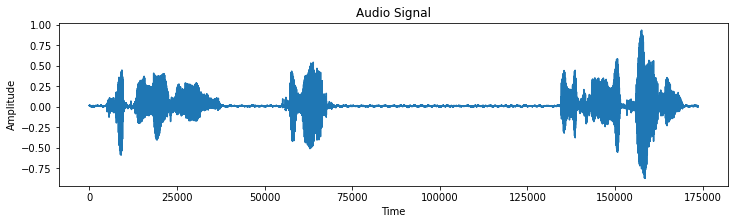

**Shape of Audio Signal** : (173644,)

**Transcript** : chapter ninety nine the law we have seen how quietly

In [ ]:
from IPython.display import Markdown, display
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

### 3.4 Acoustic Features for Speech Recognition

For this project, you won't use the raw audio waveform as input to your model.  Instead, we provide code that first performs a pre-processing step to convert the raw audio to a feature representation that has historically proven successful for ASR models.  Your acoustic model will accept the feature representation as input.

In this project, you will explore two possible feature representations.  _After completing the project_, if you'd like to read more about deep learning architectures that can accept raw audio input, you are encouraged to explore this [research paper](https://pdfs.semanticscholar.org/a566/cd4a8623d661a4931814d9dffc72ecbf63c4.pdf).

#### 3.4.1 Spectrograms

The first option for an audio feature representation is the spectrogram. The code for calculating the spectrogram was borrowed from [this repository](https://github.com/baidu-research/ba-dls-deepspeech).  The implementation appears in the `External Modules Form Repositories` in this notebook

The code provided returns the spectrogram as a 2D tensor, where the first (_vertical_) dimension indexes time, and the second (_horizontal_) dimension indexes frequency.  To speed the convergence of the training, the spectrogram tensor extracted form input audios are normalized.

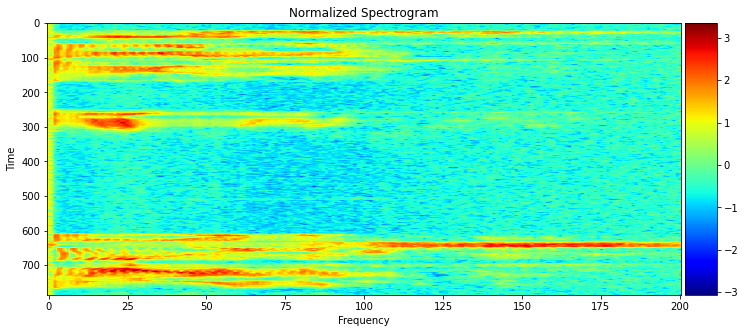

**Shape of Spectrogram** : (786, 201)

In [ ]:
# plot normalized spectrogram
plot_spectrogram_feature(vis_spectrogram_feature)
# print shape of spectrogram
display(Markdown('**Shape of Spectrogram** : ' + str(vis_spectrogram_feature.shape)))

#### 3.4.2 Mel-Frequency Cepstral Coefficients (MFCCs)

The second option for an audio feature representation is **MFCCs**. The features vector is extracted thank to the `librosa` module (more information on how the MFCCs are computed can found in the [documentation](https://librosa.org/doc/main/generated/librosa.feature.mfcc.html) of the Python package).  Just as with the spectrogram features, the MFCCs are normalized in the supplied code.

The main idea behind MFCC features is the same as spectrogram features: at each time window, the MFCC feature yields a feature vector that characterizes the sound within the window. They describes the instantaneous, spectral envelope shape of the speech signal. Note that the MFCC feature is much lower-dimensional than the spectrogram feature, which could help an acoustic model to avoid overfitting to the training dataset. 

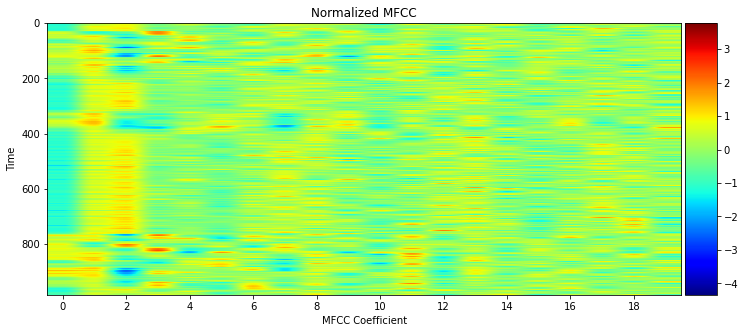

**Shape of MFCC** : (985, 20)

In [ ]:
# plot normalized MFCC
plot_mfcc_feature(vis_mfcc_feature)
# print shape of MFCC
display(Markdown('**Shape of MFCC** : ' + str(vis_mfcc_feature.shape)))

#### 3.4.2 MFCCs plus Delta features

However, speech signals are time-variant signals and in a constant flux. Though we describe speech in linguistics as concatenated sequences of phonemes, the acoustical signal is more accurately described as a sequence of transitions between phonemes.

A common method for extracting information about such transitions is to determine the first difference of signal features, known as the delta of a feature. Specifically, for a feature $f_k$, at time-instant $k$, the corresponding delta is defined as

$$ \Delta_k = f_k - f_{k-1} $$

The second difference, known as the delta-delta, is correspondingly

$$ \Delta\Delta_k = \Delta_k - \Delta_{k-1} $$

In the following, the MFCCs features vector is concatenated with the Delta and the Delta-Delta of the MFCCs features,along the coefficients dimension.

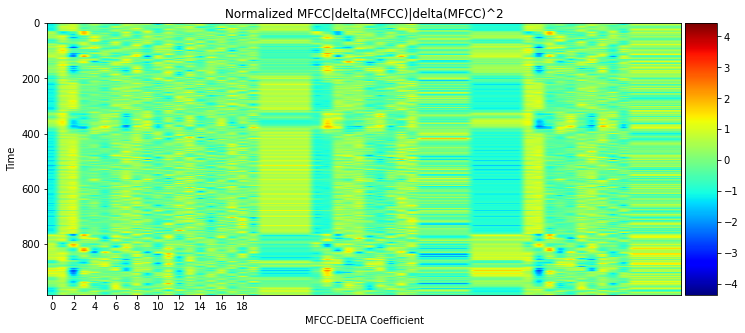

**Shape of MFCC|Delta|Delta2** : (985, 60)

In [ ]:
# plot normalized MFCC-Delta-Delta2
plot_mfcc_delta_feature(vis_mfcc_delta_feature)
# print shape of MFCC-Delta-Delta2
display(Markdown('**Shape of MFCC|Delta|Delta2** : ' + str(vis_mfcc_delta_feature.shape)))

### Models

#### Temporal Convolutional Model

##### 1st Version (with Fully-Connected block)

In [ ]:
import tensorflow.keras.layers as layers
import complexnn as q_layers

def TemporalBlock(x, quaternion, dilation_rate, nb_filters, kernel_size, padding, dropout_rate=0.0):
    init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01) 
    
    assert padding in ['causal', 'same']
    
    if quaternion:
        #block1
        conv1 = q_layers.QuaternionConv1D(filters=nb_filters, kernel_size=kernel_size,
                                          dilation_rate=dilation_rate, padding=padding)
        batch1 = q_layers.QuaternionBatchNormalization(axis=-1)
        
        
        # block2
        conv2 = q_layers.QuaternionConv1D(filters=nb_filters, kernel_size=kernel_size,
                                          dilation_rate=dilation_rate, padding=padding)
        batch2 = q_layers.QuaternionBatchNormalization(axis=-1)
        
        downsample = q_layers.QuaternionConv1D(filters=nb_filters, kernel_size=1, padding='same')
    else:
        #block1
        conv1 = layers.Conv1D(filters=nb_filters, kernel_size=kernel_size,
                              dilation_rate=dilation_rate, padding=padding, kernel_initializer=init)
        batch1 = layers.BatchNormalization(axis=-1)
        
        #block2
        conv2 = layers.Conv1D(filters=nb_filters, kernel_size=kernel_size,
                              dilation_rate=dilation_rate, padding=padding, kernel_initializer=init)
        batch2 = layers.BatchNormalization(axis=-1)
        
        downsample = layers.Conv1D(filters=nb_filters, kernel_size=1, padding='same', kernel_initializer=init) 
    
    ac1 = layers.Activation('relu')
    drop1 = layers.Dropout(rate=dropout_rate)
    
    ac2 = layers.Activation('relu')
    drop2 = layers.Dropout(rate=dropout_rate)
    
    ac3 = layers.Activation('relu')
    
    prev_x = x
    
    network = tf.keras.models.Sequential([conv1, batch1, ac1, drop1,
                                          conv2, batch2, ac2, drop2])
    
    x = network(x)
    
    if prev_x.shape[-1] != x.shape[-1]:    # match the dimention
        prev_x = downsample(prev_x)
    
    return ac3(x)



def TemporalConvNet(x, quaternion, num_channels, kernel_size=2, dropout=0.2):
        
    # num_channels is a list contains hidden sizes of Conv1D
    # assert isinstance(num_channels, list)

    # model = tf.keras.Sequential()

    # The model contains "num_levels" TemporalBlock
    num_levels = len(num_channels)
    for i in range(num_levels):
        dilation_rate = 2 ** i                  # exponential growth
        x = TemporalBlock(x, quaternion, dilation_rate, num_channels[i], kernel_size,
                          padding='causal', dropout_rate=dropout)
    return x
    


def TCNModel(quaternion, input_dim, filters, kernel_size=2, conv_stride=1,
             conv_border_mode='same', units=512, output_dim=29):
    # num_channels is a list contains hidden sizes of Conv1D
    assert isinstance(filters, list)
    
    # Main acoustic input
    input_data = layers.Input(name='the_input', shape=(None, input_dim))
    
    x = TemporalConvNet(input_data, quaternion, filters, kernel_size)
    
    conv_dim = filters[-1]
    if quaternion:
        fc_dim = conv_dim*4
        x = layers.TimeDistributed( layers.Dense(units=fc_dim) )(x)
        x = q_layers.QuaternionBatchNormalization(axis=-1)(x)
        x = layers.ReLU()(x)
        time_dense = layers.TimeDistributed( layers.Dense(units=output_dim) )(x)
        y_pred = layers.Activation('softmax', name='softmax')(time_dense)
    else:
        fc_dim = conv_dim
        x = layers.TimeDistributed( layers.Dense(units=fc_dim) )(x)
        x = layers.BatchNormalization(axis=-1)(x)
        x = layers.ReLU()(x)
        time_dense = layers.TimeDistributed( layers.Dense(units=output_dim) )(x)
        y_pred = layers.Activation('softmax', name='softmax')(time_dense)
    
    # Specify the model
    model = tf.keras.models.Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: cnn_output_length(
        x, kernel_size, conv_border_mode, conv_stride)
    print(model.summary())
    return model

##### 2nd Version (without Fully-Connected block)

In [ ]:
import tensorflow.keras.layers as layers
import complexnn as q_layers

def TemporalBlock(x, quaternion, dilation_rate, nb_filters, kernel_size, padding, dropout_rate=0.0, activation='relu'):
    init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01) 
    
    assert padding in ['causal', 'same']
    
    if quaternion:
        #block1
        conv1 = q_layers.QuaternionConv1D(filters=nb_filters, kernel_size=kernel_size,
                                          dilation_rate=dilation_rate, padding=padding)
        batch1 = q_layers.QuaternionBatchNormalization(axis=-1)
        
        
        # block2
        conv2 = q_layers.QuaternionConv1D(filters=nb_filters, kernel_size=kernel_size,
                                          dilation_rate=dilation_rate, padding=padding)
        batch2 = q_layers.QuaternionBatchNormalization(axis=-1)
        
        downsample = q_layers.QuaternionConv1D(filters=nb_filters, kernel_size=1, padding='same')
    else:
        #block1
        conv1 = layers.Conv1D(filters=nb_filters, kernel_size=kernel_size,
                              dilation_rate=dilation_rate, padding=padding, kernel_initializer=init)
        batch1 = layers.BatchNormalization(axis=-1)
        
        #block2
        conv2 = layers.Conv1D(filters=nb_filters, kernel_size=kernel_size,
                              dilation_rate=dilation_rate, padding=padding, kernel_initializer=init)
        batch2 = layers.BatchNormalization(axis=-1)
        
        downsample = layers.Conv1D(filters=nb_filters, kernel_size=1, padding='same', kernel_initializer=init) 
    
    ac1 = layers.ReLU() if activation=='relu' else layers.PReLU(shared_axes=-1) #layers.Activation('relu')
    drop1 = layers.Dropout(rate=dropout_rate)
    
    ac2 = layers.ReLU() if activation=='relu' else layers.PReLU(shared_axes=-1) #layers.Activation('relu')
    drop2 = layers.Dropout(rate=dropout_rate)
    
    ac3 = layers.ReLU() if activation=='relu' else layers.PReLU(shared_axes=-1) #layers.Activation('relu')
    
    prev_x = x
    
    network = tf.keras.models.Sequential([conv1, batch1, ac1, drop1,
                                          conv2, batch2, ac2, drop2])
    
    x = network(x)
    
    if prev_x.shape[-1] != x.shape[-1]:    # match the dimention
        prev_x = downsample(prev_x)
    
    return ac3(x)


def TemporalConvNet(x, quaternion, num_channels, kernel_size=2, dropout=0.2, activation='relu'):
        
    # num_channels is a list contains hidden sizes of Conv1D
    # assert isinstance(num_channels, list)

    # model = tf.keras.Sequential()

    # The model contains "num_levels" TemporalBlock
    num_levels = len(num_channels)
    for i in range(num_levels):
        dilation_rate = 2 ** i                  # exponential growth
        x = TemporalBlock(x, quaternion, dilation_rate, num_channels[i], kernel_size,
                          padding='causal', dropout_rate=dropout, activation=activation)
    return x


def TCNModel(quaternion, input_dim, filters, kernel_size=2, conv_stride=1,
             conv_border_mode='same', activation='relu', output_dim=29):
    # num_channels is a list contains hidden sizes of Conv1D
    assert isinstance(filters, list)
    
    # Main acoustic input
    input_data = layers.Input(name='the_input', shape=(None, input_dim))
    
    x = TemporalConvNet(input_data, quaternion, filters, kernel_size)
    
    conv_dim = filters[-1]
    if quaternion:
        # fc_dim = conv_dim*4
        # x = layers.TimeDistributed( layers.Dense(units=fc_dim) )(x)
        # x = q_layers.QuaternionBatchNormalization(axis=-1)(x)
        # x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x)
        time_dense = layers.TimeDistributed( layers.Dense(units=output_dim) )(x)
        y_pred = layers.Activation('softmax', name='softmax')(time_dense)
    else:
        # fc_dim = conv_dim
        # x = layers.TimeDistributed( layers.Dense(units=fc_dim) )(x)
        # x = layers.BatchNormalization(axis=-1)(x)
        # x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x)
        time_dense = layers.TimeDistributed( layers.Dense(units=output_dim) )(x)
        y_pred = layers.Activation('softmax', name='softmax')(time_dense)
    
    # Specify the model
    model = tf.keras.models.Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: cnn_output_length(
        x, kernel_size, conv_border_mode, conv_stride)
    print(model.summary())
    return model

#### Residual Convolutional Model

In [ ]:
import complexnn as q_layers
import tensorflow.keras.layers as layers

def residual_block(quaternion, x, filters, conv_num=3, activation="relu"):
    if quaternion:
        # Shortcut
        s = q_layers.QuaternionConv1D(filters, 1, padding="same")(x)
        for i in range(conv_num - 1):
            x = q_layers.QuaternionConv1D(filters, 3, padding="same")(x)
            x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x) #layers.Activation(activation)(x)
        x = q_layers.QuaternionConv1D(filters, 3, padding="same")(x)
    else:
        # Shortcut
        s = layers.Conv1D(filters, 1, padding="same")(x)
        for i in range(conv_num - 1):
            x = layers.Conv1D(filters, 3, padding="same")(x)
            x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x) #layers.Activation(activation)(x)
        x = layers.Conv1D(filters, 3, padding="same")(x)
        
    x = layers.Add()([x, s])
    #x = keras.layers.Activation(activation)(x)
    x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x)
    
    return x # layers.MaxPool1D(pool_size=2, strides=2)(x)

def fully_connected_block(quaternion, x, units=256, activation='relu'):
    if quaternion:
        x = layers.TimeDistributed( q_layers.QuaternionDense(256) )(x)
        x = q_layers.QuaternionBatchNormalization(axis=-1)(x)
        x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x)
        x = layers.TimeDistributed( q_layers.QuaternionDense(128) )(x)
        x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x)
    else:
        x = layers.TimeDistributed( layers.Dense(256) )(x)
        x = layers.BatchNormalization(axis=-1)(x)
        x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x)
        x = layers.TimeDistributed( layers.Dense(128) )(x)
        x = layers.ReLU()(x) if activation=='relu' else layers.PReLU(shared_axes=-1)(x)
    
    return x


def ResCNN_model(quaternion, input_dim, kernel_size, conv_stride=1, conv_border_mode='same', output_dim=29):
    input_data = layers.Input(shape=(None, input_dim), name="the_input")

    if quaternion:
        x = residual_block(quaternion, input_data, 8, 2)
        x = residual_block(quaternion, x, 16, 2)
        x = residual_block(quaternion, x, 32, 3)
        x = residual_block(quaternion, x, 32, 3)
        x = residual_block(quaternion, x, 64, 3)
    else:
        x = residual_block(quaternion, input_data, 32, 2)
        x = residual_block(quaternion, x, 64, 2)
        x = residual_block(quaternion, x, 128, 3)
        x = residual_block(quaternion, x, 256, 3)
        x = residual_block(quaternion, x, 256, 3)

    # x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    # x = keras.layers.Flatten()(x)
    x = fully_connected_block(quaternion, x, 256)
    
    time_dense = layers.TimeDistributed( layers.Dense(output_dim))(x)
    y_pred = layers.Activation('softmax', name='softmax')(time_dense)
    
    # Specify the model
    model = tf.keras.models.Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: cnn_output_length( 
        x, kernel_size, conv_border_mode, conv_stride)
    
    print(model.summary())
    return model

## Part 4 - Experimental evaluation

### 4.1 Training models

#### ResCNN - Quaternion

##### [Experiment 1st]
- Input features: Quaternions (batch, time, 20 $\cdot$ 3)
- kernel size = 3
- padding = same
- activation = ReLU
- optimizer = RMSProp
- learing rate = 0.0005

In [ ]:
rescnn_quaternion = ResCNN_model(quaternion=True,
                                 input_dim=60,
                                 kernel_size=3,
                                 conv_stride=1,
                                 conv_border_mode='same',
                                 output_dim=29)

QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (1, 15, 8)

> > kernel_size: (1,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (3, 15, 8)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (3, 8, 8)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 32})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (1, 8, 16)

> > kernel_size: (1,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 32})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (3, 8, 16)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, a

In [ ]:
train_model(input_to_softmax = rescnn_quaternion,
            pickle_path='rescnn_50ep_quaternion.pickle', 
            save_model_path='rescnn_50ep_quaternion.h5',
            epochs=50,
            minibatch_size=32,
            quaternion=True,
            spectrogram=False,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
66/66 [==============================] - 1179s 18s/step - loss: 1180.1226 - val_loss: 249.1944
Epoch 2/50
66/66 [==============================] - 138s 2s/step - loss: 447.7906 - val_loss: 1653.2515
Epoch 3/50
66/66 [==============================] - 127s 2s/step - loss: 1823.8458 - val_loss: 1303.8851
Epoch 4/50
66/66 [==============================] - 124s 2s/step - loss: 1367.3196 - val_loss: 797.0334
Epoch 5/50
66/66 [==============================] - 125s 2s/step - loss: 797.8375 - val_loss: 378.3940
Epoch 6/50
66/66 [==============================] - 124s 2s/step - loss: 360.2218 - val_loss: 231.7035
Epoch 7/50
66/66 [==============================] - 124s 2s/step - loss: 265.9098 - val_loss: 228.3219
Epoch 8/50
66/66 [==============================] - 125s 2s/step - loss: 258.6459 - val_loss: 226.9959
Epoch 9/50
66/66 [==============================] - 123s 2s/step - loss: 258.6776 - val_loss: 220.0959
Epoch 10/50
66/66 [==============================] - 125s 2s/step 

##### [Experiment 2nd]
- Input features: Quaternions (batch, time, 20 $\cdot$ 3)
- kernel size = 3
- padding = valid (max pooling added) 
- activation = PReLU
- optimizer = Adam
- learing rate = 0.0005

In [ ]:
rescnn_2nd_pooling_quaternion = ResCNN_model(quaternion=True,
                                             input_dim=60,
                                             kernel_size=3,
                                             conv_stride=1,
                                             conv_border_mode='valid',
                                             activation='prelu',
                                             output_dim=29)

QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (1, 15, 8)

> > kernel_size: (1,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (3, 15, 8)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (3, 8, 8)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 32})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (1, 8, 16)

> > kernel_size: (1,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 32})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (3, 8, 16)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, a

In [ ]:
train_model(input_to_softmax = rescnn_2nd_pooling_quaternion,
            pickle_path='rescnn_pooling_50ep_quaternion.pickle', 
            save_model_path='rescnn_pooling_50ep_quaternion.h5',
            epochs=50,
            minibatch_size=20,
            quaternion=True,
            spectrogram=False,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
118/118 [==============================] - 709s 6s/step - loss: 1360.1737 - val_loss: 533.7125
Epoch 2/50
118/118 [==============================] - 158s 1s/step - loss: 590.6488 - val_loss: 1826.8940
Epoch 3/50
118/118 [==============================] - 150s 1s/step - loss: 2054.0091 - val_loss: 1713.9720
Epoch 4/50
118/118 [==============================] - 152s 1s/step - loss: 1938.8516 - val_loss: 1563.5995
Epoch 5/50
118/118 [==============================] - 150s 1s/step - loss: 1757.4474 - val_loss: 1397.6052
Epoch 6/50
118/118 [==============================] - 146s 1s/step - loss: 1551.1715 - val_loss: 1168.3900
Epoch 7/50
118/118 [==============================] - 146s 1s/step - loss: 1279.7742 - val_loss: 955.3712
Epoch 8/50
118/118 [==============================] - 145s 1s/step - loss: 1019.3752 - val_loss: 734.1866
Epoch 9/50
118/118 [==============================] - 144s 1s/step - loss: 789.6478 - val_loss: 553.4056
Epoch 10/50
118/118 [======================

In [ ]:
rescnn_2nd_pooling_quaternion_load = ResCNN_model(quaternion=True,
                                                  input_dim=60,
                                                  kernel_size=3,
                                                  conv_stride=1,
                                                  conv_border_mode='valid',
                                                  activation='prelu',
                                                  output_dim=29)

rescnn_2nd_pooling_quaternion_load.load_weights("new_results/rescnn_pooling_50ep_quaternion.h5")

QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (1, 15, 8)

> > kernel_size: (1,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (3, 15, 8)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (3, 8, 8)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 32})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (1, 8, 16)

> > kernel_size: (1,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 32})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (3, 8, 16)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, a

In [ ]:
train_model(input_to_softmax = rescnn_2nd_pooling_quaternion_load,
            pickle_path='rescnn_pooling_50ep_loaded_quaternion.pickle', 
            save_model_path='rescnn_pooling_50ep_loaded_quaternion.h5',
            epochs=50,
            minibatch_size=20,
            quaternion=True,
            spectrogram=False,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
118/118 [==============================] - 1111s 9s/step - loss: 257.7457 - val_loss: 223.6795
Epoch 2/50
118/118 [==============================] - 155s 1s/step - loss: 258.4697 - val_loss: 223.8829
Epoch 3/50
118/118 [==============================] - 149s 1s/step - loss: 254.6328 - val_loss: 222.9418
Epoch 4/50
118/118 [==============================] - 147s 1s/step - loss: 259.3092 - val_loss: 225.2624
Epoch 5/50
118/118 [==============================] - 147s 1s/step - loss: 254.8329 - val_loss: 223.7649
Epoch 6/50
118/118 [==============================] - 148s 1s/step - loss: 262.5707 - val_loss: 223.2615
Epoch 7/50
118/118 [==============================] - 145s 1s/step - loss: 258.9497 - val_loss: 223.8988
Epoch 8/50
118/118 [==============================] - 146s 1s/step - loss: 258.0301 - val_loss: 224.0092
Epoch 9/50
118/118 [==============================] - 149s 1s/step - loss: 255.3134 - val_loss: 223.0175
Epoch 10/50
118/118 [==============================] -

#### ResCNN - Real

##### [Experiment 1st]
- Input features: Real (batch, time, 60)
- kernel size = 3
- padding = same
- activation = ReLU
- optimizer = Adam
- learing rate = 0.0001

In [ ]:
rescnn_real = ResCNN_model(quaternion=False,
                           input_dim=60,
                           kernel_size=3,
                           conv_stride=1,
                           conv_border_mode='same',
                           output_dim=29)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          [(None, None, 60)]   0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 32)     5792        the_input[0][0]                  
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, None, 32)     0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, None, 32)     3104        re_lu[0][0]                      
______________________________________________________________________________________________

In [ ]:
train_model(input_to_softmax = rescnn_real,
            pickle_path='rescnn_50ep_real.pickle', 
            save_model_path='rescnn_50ep_real.h5',
            epochs=50,
            minibatch_size=32,
            quaternion=True,
            spectrogram=False,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
66/66 [==============================] - 1100s 16s/step - loss: 803.5927 - val_loss: 1178.7932
Epoch 2/50
66/66 [==============================] - 142s 2s/step - loss: 470.4524 - val_loss: 889.8262
Epoch 3/50
66/66 [==============================] - 126s 2s/step - loss: 459.0588 - val_loss: 494.0448
Epoch 4/50
66/66 [==============================] - 126s 2s/step - loss: 432.6817 - val_loss: 511.2389
Epoch 5/50
66/66 [==============================] - 125s 2s/step - loss: 436.9375 - val_loss: 478.3182
Epoch 6/50
66/66 [==============================] - 124s 2s/step - loss: 428.2127 - val_loss: 376.1496
Epoch 7/50
66/66 [==============================] - 124s 2s/step - loss: 423.0537 - val_loss: 466.5261
Epoch 8/50
66/66 [==============================] - 124s 2s/step - loss: 422.7762 - val_loss: 448.9294
Epoch 9/50
66/66 [==============================] - 124s 2s/step - loss: 429.6233 - val_loss: 406.0770
Epoch 10/50
66/66 [==============================] - 124s 2s/step - lo

#### 4.2 TCN - Quaternion

##### [Experiment 1st]
- Input features: Quaternions (batch, time, 20 $\cdot$ 3)
- kernel size = 2
- padding = same
- stride = 1
- activation = ReLU
- optimizer = RMSProp
- learing rate = 0.0001

In [ ]:
# Create Quaternion TCN Model
tcn_quaternion = TCNModel(quaternion=True,
                          input_dim=60,
                          filters=[8,16,32,64],
                          kernel_size=2,
                          conv_stride=1,
                          conv_border_mode='same',
                          output_dim=29)

QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (2, 15, 8)

> > kernel_size: (2,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (2, 8, 8)

> > kernel_size: (2,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 32})


QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (1, 15, 8)

> > kernel_size: (1,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (2, 8, 16)

> > kernel_size: (2,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 32})


QuaternionConv
> build
> > input_shape: (None, None, 64)


> > input_dim: 16


> > kernel_shape: (2, 16, 16)

> > kernel_size: (2,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3,

In [ ]:
# Train Model
train_model(input_to_softmax = tcn_quaternion, 
            pickle_path='tcn_quaternion.pickle', 
            save_model_path='tcn_quaternion.h5',
            epochs=50,
            minibatch_size=32,
            quaternion=True,
            spectrogram=False,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
66/66 [==============================] - 1195s 18s/step - loss: 1174.9941 - val_loss: 259.9120
Epoch 2/50
66/66 [==============================] - 136s 2s/step - loss: 263.9146 - val_loss: 239.9091
Epoch 3/50
66/66 [==============================] - 125s 2s/step - loss: 259.9334 - val_loss: 232.9262
Epoch 4/50
66/66 [==============================] - 123s 2s/step - loss: 258.9883 - val_loss: 228.4256
Epoch 5/50
66/66 [==============================] - 122s 2s/step - loss: 262.2477 - val_loss: 223.1357
Epoch 6/50
66/66 [==============================] - 122s 2s/step - loss: 252.8853 - val_loss: 223.6383
Epoch 7/50
66/66 [==============================] - 121s 2s/step - loss: 254.5289 - val_loss: 219.7626
Epoch 8/50
66/66 [==============================] - 123s 2s/step - loss: 250.4487 - val_loss: 219.4240
Epoch 9/50
66/66 [==============================] - 121s 2s/step - loss: 247.3190 - val_loss: 211.2817
Epoch 10/50
66/66 [==============================] - 121s 2s/step - lo

##### [Experiment 2nd]
- Input features: Quaternions (batch, time, 20 $\cdot$ 3)
- kernel size = 3
- padding = same
- stride = 1
- activation = ReLU
- optimizer = RMSProp
- learing rate = 0.0001

In [ ]:
tcn_2nd_quaternion = TCNModel(quaternion=True,
                              input_dim=60,
                              filters=[12, 8, 4],
                              kernel_size=3,
                              conv_stride=1,
                              conv_border_mode='same',
                              activation='relu',
                              output_dim=29)

QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (3, 15, 12)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 48)


> > input_dim: 12


> > kernel_shape: (3, 12, 12)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 48})


QuaternionConv
> build
> > input_shape: (None, None, 60)


> > input_dim: 15


> > kernel_shape: (1, 15, 12)

> > kernel_size: (1,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 60})


QuaternionConv
> build
> > input_shape: (None, None, 48)


> > input_dim: 12


> > kernel_shape: (3, 12, 8)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim=3, axes={-1: 48})


QuaternionConv
> build
> > input_shape: (None, None, 32)


> > input_dim: 8


> > kernel_shape: (3, 8, 8)

> > kernel_size: (3,)


> > OK - kernel - 

> > input_spec: InputSpec(ndim

In [ ]:
train_model(input_to_softmax = tcn_2nd_quaternion,
            pickle_path='tcn_2nd_100ep_quaternion.pickle', 
            save_model_path='tcn_2nd_100ep_quaternion.h5',
            epochs=100,
            minibatch_size=24,
            quaternion=True,
            spectrogram=False,
            mfcc_dim=20,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
88/88 [==============================] - 1392s 16s/step - loss: 2041.5403 - val_loss: 1689.6464
Epoch 2/100
88/88 [==============================] - 146s 2s/step - loss: 1976.4244 - val_loss: 1570.1478
Epoch 3/100
88/88 [==============================] - 140s 2s/step - loss: 1879.0870 - val_loss: 1471.6697
Epoch 4/100
88/88 [==============================] - 142s 2s/step - loss: 1780.3420 - val_loss: 1342.7428
Epoch 5/100
88/88 [==============================] - 141s 2s/step - loss: 1659.1043 - val_loss: 1244.0333
Epoch 6/100
88/88 [==============================] - 140s 2s/step - loss: 1535.5039 - val_loss: 1131.4894
Epoch 7/100
88/88 [==============================] - 138s 2s/step - loss: 1417.5134 - val_loss: 1003.2659
Epoch 8/100
88/88 [==============================] - 138s 2s/step - loss: 1298.1379 - val_loss: 893.6968
Epoch 9/100
88/88 [==============================] - 138s 2s/step - loss: 1190.1149 - val_loss: 807.4431
Epoch 10/100
88/88 [==========================

#### 4.2 TCN - Real

##### [Experiment 1st]
- Input features: Real (batch, time, 60)
- kernel size = 2
- padding = same
- stride = 1
- activation = ReLU
- optimizer = Adam
- learing rate = 0.0005

In [ ]:
# Create Quaternion TCN Model
tcn_real = TCNModel(quaternion=False,
                    input_dim=60,
                    filters=[32,64,128,256],
                    kernel_size=2,
                    conv_stride=1,
                    conv_border_mode='same',
                    output_dim=29)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 60)]        0         
_________________________________________________________________
sequential_4 (Sequential)    (None, None, 32)          6208      
_________________________________________________________________
activation_14 (Activation)   (None, None, 32)          0         
_________________________________________________________________
sequential_5 (Sequential)    (None, None, 64)          12928     
_________________________________________________________________
activation_17 (Activation)   (None, None, 64)          0         
_________________________________________________________________
sequential_6 (Sequential)    (None, None, 128)         50432     
_________________________________________________________________
activation_20 (Activation)   (None, None, 128)         0   

In [ ]:
# Train Model
train_model(input_to_softmax = tcn_real, 
            pickle_path='tcn_50ep_real.pickle', 
            save_model_path='tcn_50ep_real.h5',
            epochs=50,
            minibatch_size=32,
            quaternion=True,
            spectrogram=False,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
66/66 [==============================] - 1062s 16s/step - loss: 621.3474 - val_loss: 1822.9016
Epoch 2/50
66/66 [==============================] - 137s 2s/step - loss: 247.8064 - val_loss: 818.9862
Epoch 3/50
66/66 [==============================] - 122s 2s/step - loss: 228.1403 - val_loss: 233.9570
Epoch 4/50
66/66 [==============================] - 125s 2s/step - loss: 223.4132 - val_loss: 304.7195
Epoch 5/50
66/66 [==============================] - 122s 2s/step - loss: 215.5209 - val_loss: 293.5244
Epoch 6/50
66/66 [==============================] - 123s 2s/step - loss: 211.2048 - val_loss: 209.3724
Epoch 7/50
66/66 [==============================] - 124s 2s/step - loss: 206.3079 - val_loss: 186.0287
Epoch 8/50
66/66 [==============================] - 124s 2s/step - loss: 202.7859 - val_loss: 171.7849
Epoch 9/50
66/66 [==============================] - 124s 2s/step - loss: 203.3123 - val_loss: 166.9546
Epoch 10/50
66/66 [==============================] - 125s 2s/step - lo

##### [Experiment 2nd]
- Input features: Real (batch, time, 40)
- kernel size = 3
- padding = same
- stride = 1
- activation = ReLU
- optimizer = RMSProp
- learing rate = 0.0005

In [ ]:
# Create Quaternion TCN Model
tcn_3rd_real = TCNModel(quaternion=False,
                        input_dim=40,
                        filters=[80, 64, 48, 32, 16],
                        kernel_size=3,
                        conv_stride=1,
                        conv_border_mode='same',
                        output_dim=29)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 40)]        0         
_________________________________________________________________
sequential_5 (Sequential)    (None, None, 80)          29600     
_________________________________________________________________
re_lu_3 (ReLU)               (None, None, 80)          0         
_________________________________________________________________
sequential_6 (Sequential)    (None, None, 64)          28288     
_________________________________________________________________
re_lu_6 (ReLU)               (None, None, 64)          0         
_________________________________________________________________
sequential_7 (Sequential)    (None, None, 48)          16608     
_________________________________________________________________
re_lu_9 (ReLU)               (None, None, 48)          0   

In [ ]:
# Train Model
train_model(input_to_softmax = tcn_3rd_real, 
            pickle_path='tcn_3rd_50ep_real.pickle', 
            save_model_path='tcn_3rd_50ep_real.h5',
            epochs=50,
            minibatch_size=20,
            quaternion=False,
            spectrogram=False,
            mfcc_dim=40,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
106/106 [==============================] - 514s 5s/step - loss: 1701.7501 - val_loss: 1849.2250
Epoch 2/50
106/106 [==============================] - 113s 1s/step - loss: 1277.7701 - val_loss: 1780.7246
Epoch 3/50
106/106 [==============================] - 106s 1s/step - loss: 1108.0385 - val_loss: 1388.7321
Epoch 4/50
106/106 [==============================] - 106s 1s/step - loss: 1046.7985 - val_loss: 1280.3882
Epoch 5/50
106/106 [==============================] - 105s 990ms/step - loss: 980.3152 - val_loss: 874.2701
Epoch 6/50
106/106 [==============================] - 104s 981ms/step - loss: 897.4384 - val_loss: 695.0400
Epoch 7/50
106/106 [==============================] - 105s 989ms/step - loss: 847.9772 - val_loss: 610.8009
Epoch 8/50
106/106 [==============================] - 104s 989ms/step - loss: 800.0769 - val_loss: 527.4066
Epoch 9/50
106/106 [==============================] - 104s 988ms/step - loss: 749.6387 - val_loss: 548.0593
Epoch 10/50
106/106 [===========

In [ ]:
# Create Quaternion TCN Model
tcn_3rd_real_load = TCNModel(quaternion=False,
                             input_dim=40,
                             filters=[80, 64, 48, 32, 16],
                             kernel_size=3,
                             conv_stride=1,
                             conv_border_mode='same',
                             output_dim=29)

tcn_3rd_real_load.load_weights("new_results/tcn_3rd_50ep_real.h5")

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 40)]        0         
_________________________________________________________________
sequential_20 (Sequential)   (None, None, 80)          29600     
_________________________________________________________________
re_lu_48 (ReLU)              (None, None, 80)          0         
_________________________________________________________________
sequential_21 (Sequential)   (None, None, 64)          28288     
_________________________________________________________________
re_lu_51 (ReLU)              (None, None, 64)          0         
_________________________________________________________________
sequential_22 (Sequential)   (None, None, 48)          16608     
_________________________________________________________________
re_lu_54 (ReLU)              (None, None, 48)          0   

In [ ]:
# Train Model
train_model(input_to_softmax = tcn_3rd_real_load, 
            pickle_path='tcn_3rd_50ep_loaded_real.pickle', 
            save_model_path='tcn_3rd_50ep_loaded_real.h5',
            epochs=50,
            minibatch_size=20,
            quaternion=False,
            spectrogram=False,
            mfcc_dim=40,
            mode=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
106/106 [==============================] - 389s 4s/step - loss: 289.3941 - val_loss: 240.4745
Epoch 2/50
106/106 [==============================] - 133s 1s/step - loss: 283.6396 - val_loss: 237.5821
Epoch 3/50
106/106 [==============================] - 114s 1s/step - loss: 280.5030 - val_loss: 234.5965
Epoch 4/50
106/106 [==============================] - 112s 1s/step - loss: 275.7533 - val_loss: 232.9712
Epoch 5/50
106/106 [==============================] - 112s 1s/step - loss: 279.8030 - val_loss: 233.3782
Epoch 6/50
106/106 [==============================] - 113s 1s/step - loss: 269.6241 - val_loss: 232.9641
Epoch 7/50
106/106 [==============================] - 112s 1s/step - loss: 277.5311 - val_loss: 229.4449
Epoch 8/50
106/106 [==============================] - 111s 1s/step - loss: 275.1465 - val_loss: 229.4686
Epoch 9/50
106/106 [==============================] - 111s 1s/step - loss: 272.0880 - val_loss: 230.2094
Epoch 10/50
106/106 [==============================] - 

### 4.2 Performance Evaluations

Execute the code cell below to evaluate the performance of the drafted deep learning models.  The training and validation loss are plotted for each model.

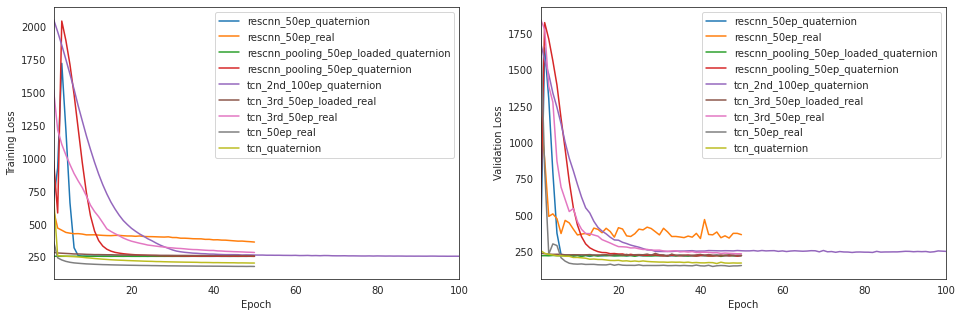

In [ ]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='white')

# obtain the paths for the saved model history
all_pickles = sorted(glob("results/*.pickle"))
# extract the name of each model
model_names = [item[8:-7] for item in all_pickles]
# extract the loss history for each model
valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
# save the number of epochs used to train each model
num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

fig = plt.figure(figsize=(16,5))

# plot the training loss vs. epoch for each model
ax1 = fig.add_subplot(121)
for i in range(len(all_pickles)):
    ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            train_loss[i], label=model_names[i])
# clean up the plot
ax1.legend()  
ax1.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# plot the validation loss vs. epoch for each model
ax2 = fig.add_subplot(122)
for i in range(len(all_pickles)):
    ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            valid_loss[i], label=model_names[i])
# clean up the plot
ax2.legend()  
ax2.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()